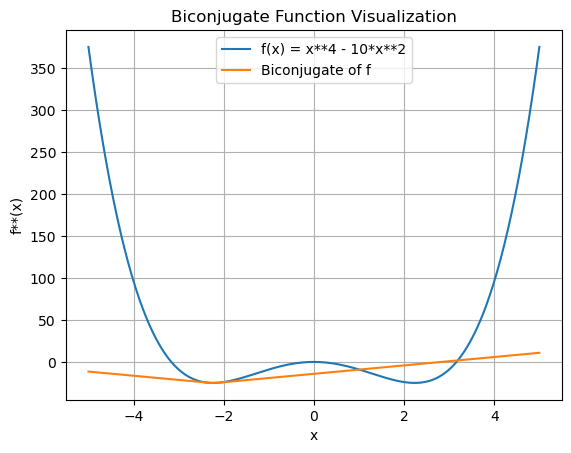

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the function f
def f(x):
    return x**4 - 10*x**2

# Define the conjugate function f*
def f_conjugate(y, x_bounds):
    # Compute the conjugate over the domain
    minimized_result = minimize(lambda x: f(x) - y * x, -1, bounds=x_bounds, method='Nelder-Mead')
    return minimized_result.x, -minimized_result.fun

# Define the biconjugate function f**
def f_biconjugate(x, y_bounds):
    # Compute the biconjugate over the domain
    minimized_result = minimize(lambda y: f_conjugate(y, x_bounds)[1] - x * y, -1, bounds=y_bounds, method='Nelder-Mead')
    return minimized_result.x, -minimized_result.fun

# Domain for the variable x and y
x_bounds = np.array([(-5, 5)])
y_bounds = np.array([(-5, 5)])

x_domain = np.linspace(-5, 5, 500)
f_values = f(x_domain)
biconjugate_values = np.array([f_biconjugate(x, y_bounds)[1] for x in x_domain])


# Plot the biconjugate function
plt.plot(x_domain, f_values, label='f(x) = x**4 - 10*x**2')
plt.plot(x_domain, biconjugate_values, label='Biconjugate of f')
plt.title('Biconjugate Function Visualization')
plt.xlabel('x')
plt.ylabel('f**(x)')
plt.legend()
plt.grid(True)
plt.show()


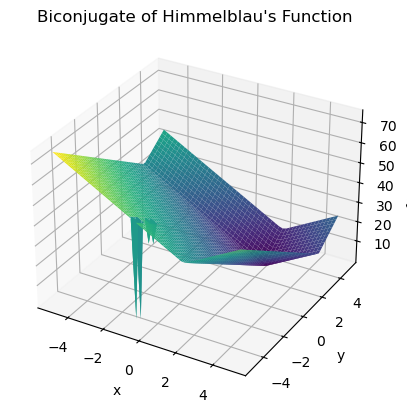

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the nonconvex 2D function (Himmelblau's function)
def himmelblaus_function(X):
    return (X[0]**2 + X[1] - 11)**2 + (X[0] + X[1]**2 - 7)**2

def himmelblaus_conjugate(Y, X_bounds):
    # Compute the conjugate over the domain
    minimized_result = minimize(lambda X: himmelblaus_function(X) - np.dot(Y, X), [0, 2], bounds=X_bounds, method='L-BFGS-B')
    return minimized_result.x, -minimized_result.fun

def himmelblaus_biconjugate(X, X_bounds, Y_bounds):
    # Compute the biconjugate over the domain
    minimized_result = minimize(lambda Y: himmelblaus_conjugate(Y, X_bounds)[1] - np.dot(X, Y), [0, 2], bounds=Y_bounds, method='L-BFGS-B')
    return minimized_result.x, -minimized_result.fun

X_bounds = np.array([(-5, 5), (-5, 5)])
Y_bounds = np.array([(-5, 5), (-5, 5)])

# Generate domain for plotting
X0_domain = np.linspace(-5, 5, 50)
X1_domain = np.linspace(-5, 5, 50)
X_domain = np.array(np.meshgrid(X0_domain, X1_domain)).T.reshape(-1, 2)

# Compute the biconjugate values for each point in the domain
Z = np.array([himmelblaus_biconjugate(x, X_bounds, Y_bounds)[1] for x in X_domain])

# Prepare for plotting
X0_domain, X1_domain = np.meshgrid(X0_domain, X1_domain)
Z = Z.reshape(X0_domain.shape)

# Plot the biconjugate function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X0_domain, X1_domain, Z, cmap='viridis')

ax.set_title("Biconjugate of Himmelblau's Function")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f**(x, y)')

plt.show()

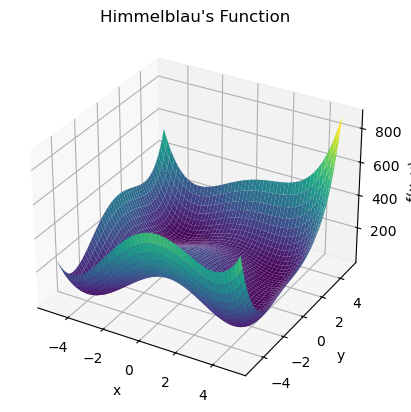

In [64]:
# Create a grid of x and y values in the range of -5 to 5
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
x, y = np.meshgrid(x, y)

# Calculate the z values for our function
z = himmelblaus_function([x, y])

# Plot the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

ax.set_title("Himmelblau's Function")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

plt.show()

(2, 100, 100)